In [27]:
import pandas as pd
import io

In [28]:
df = pd.read_csv("../data/Outlier_remove_dataset.csv")
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1       

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [30]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Post-Scaling Statistics:\n", df[numerical_features].describe())

Post-Scaling Statistics:
              tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -3.783239e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -1.005780e+00
25%   -9.516817e-01   -9.725399e-01 -8.299464e-01
50%   -1.372744e-01    1.857327e-01 -3.905282e-01
75%    9.214551e-01    8.338335e-01  6.648034e-01
max    1.613701e+00    1.794352e+00  2.825806e+00


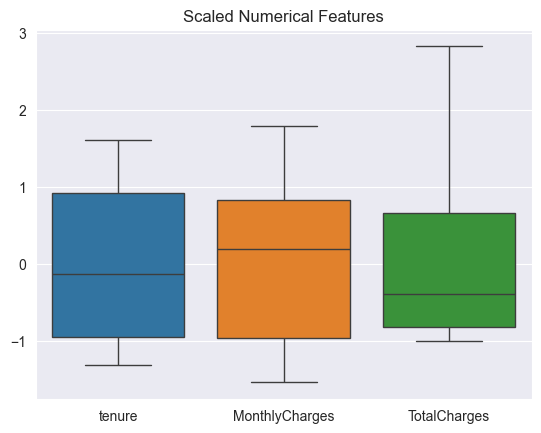

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[numerical_features])
plt.title('Scaled Numerical Features')
plt.savefig('../results/eda_visualizations/IT24101536/totalcharges_distribution8.png',
            dpi=500, bbox_inches='tight')

plt.show()
plt.close()


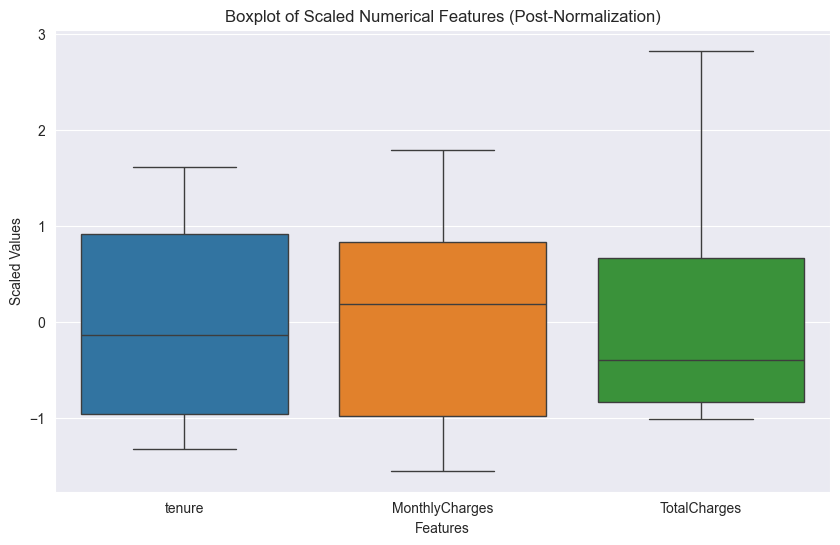

<Figure size 640x480 with 0 Axes>

In [41]:
# Import for visualization (add at top if not already)
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Visualization: Boxplot of scaled numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Scaled Numerical Features (Post-Normalization)')
plt.ylabel('Scaled Values')
plt.xlabel('Features')
plt.savefig('totalcharges_distribution5.png')
plt.show()


plt.savefig('../results/eda_visualizations/IT24101536/totalcharges_distribution5.png',
            dpi=200, bbox_inches='tight')
plt.show()

plt.close()



In [35]:
df.to_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/scale_dataset.csv", index=False)
